<a href="https://colab.research.google.com/github/salonisuman06/Tesla_stockprice_prediction_using_linear-regression/blob/main/tesla_pricepred_using_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [111]:
df=pd.read_csv('/content/TSLA (1).csv')

In [112]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
1,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
2,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
3,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500
4,2010-07-07,3.280,3.326,2.996,3.160,3.160,34608500


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579 entries, 0 to 2578
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2579 non-null   object 
 1   Open       2579 non-null   float64
 2   High       2579 non-null   float64
 3   Low        2579 non-null   float64
 4   Close      2579 non-null   float64
 5   Adj Close  2579 non-null   float64
 6   Volume     2579 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 141.2+ KB


In [114]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2.579000e+03
mean,49.206686,50.301806,48.073117,49.253279,49.253279,3.078217e+07
std,57.934102,59.888383,55.852349,58.119783,58.119783,2.855717e+07
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,7.159000,7.268000,6.989000,7.153000,7.153000,1.047400e+07
50%,44.001999,44.660000,43.301998,43.924000,43.924000,2.413100e+07
75%,59.339000,60.171000,57.841000,59.020000,59.020000,3.979150e+07
max,502.140015,502.489990,470.510010,498.320007,498.320007,3.046940e+08


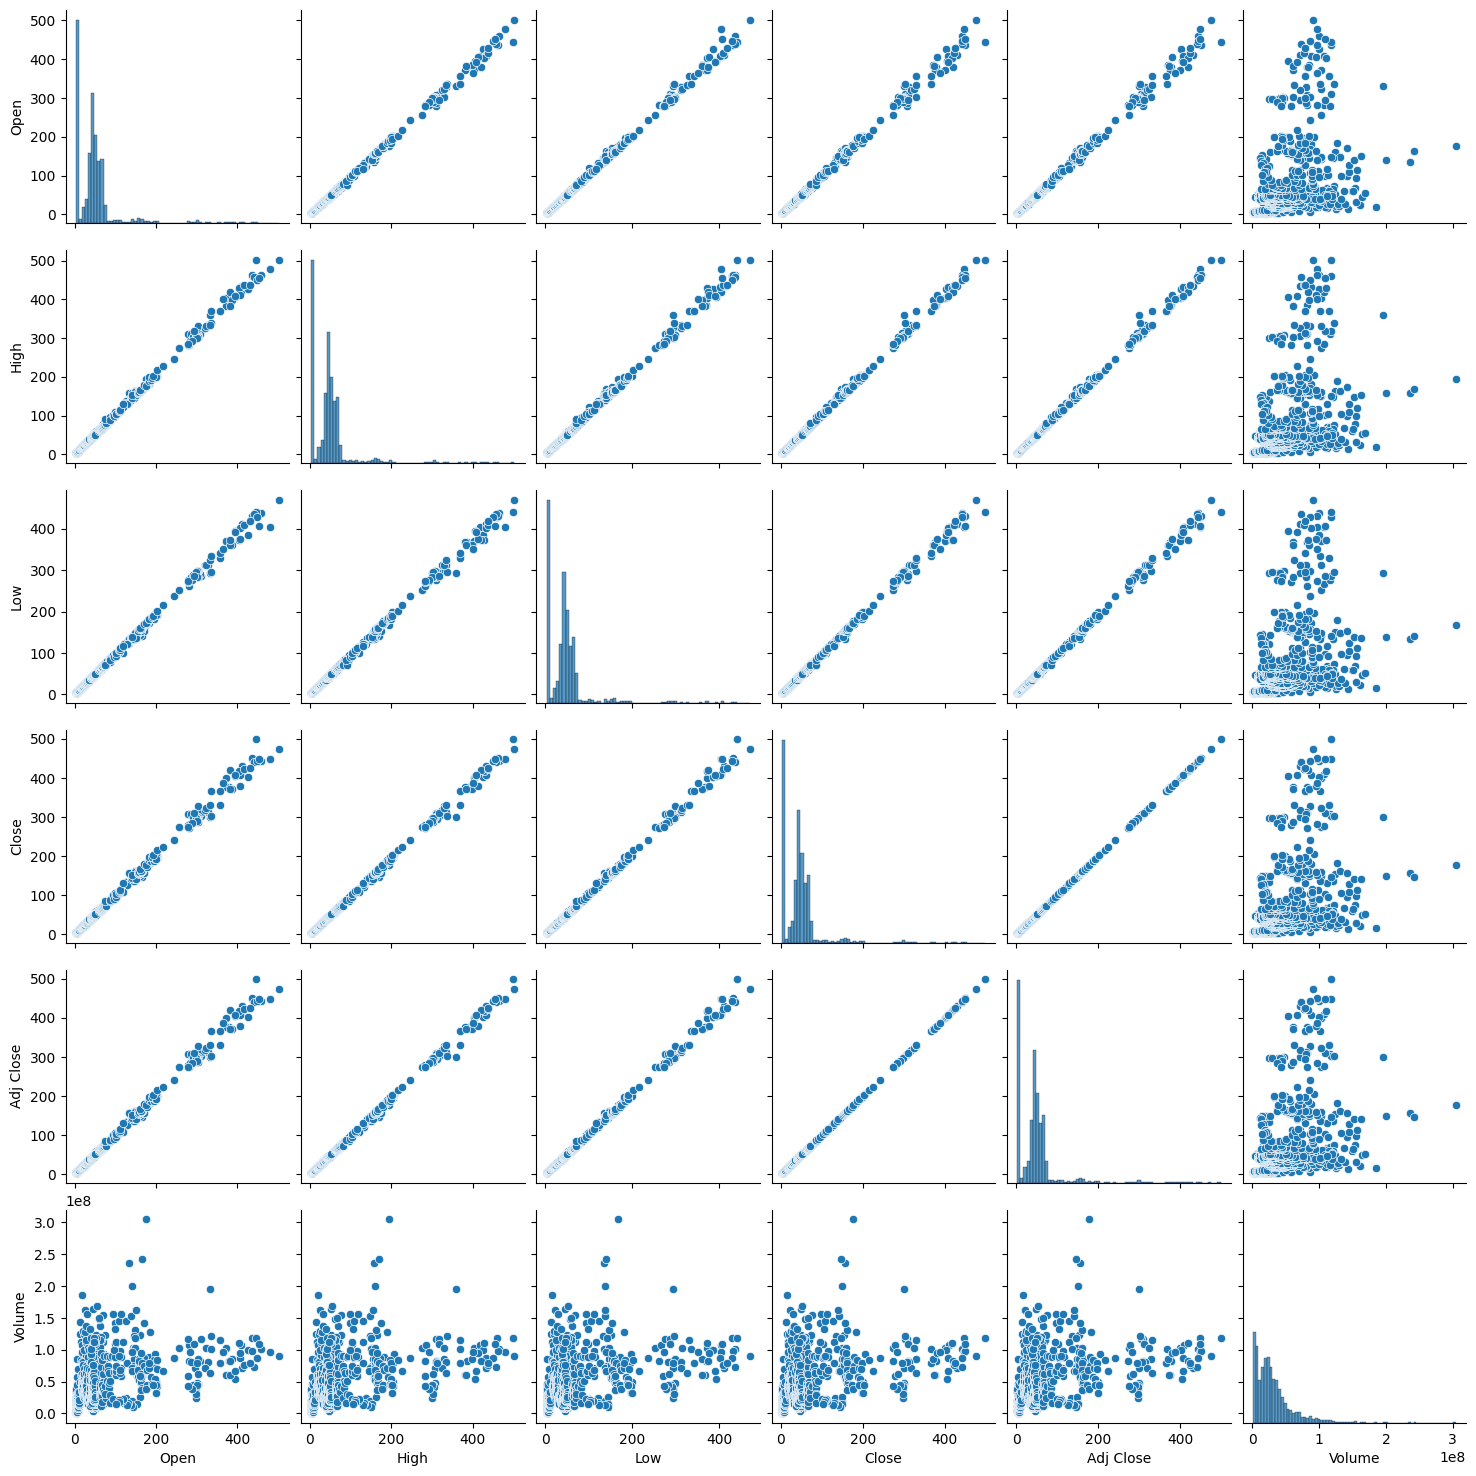

In [115]:
sns.pairplot(data=df)

Aim is to predict the closing price of the stock based on the following feature:

1.Open

2.High

3.Low

4.Volume

'Date' column to be dropped as it is not needed here to predict the closing price of the prediction. Moreover it is a categorical data whereas others are of floating point type.

We'll also drop 'Adj Close' column since it haas same values as that of 'Close' column

In [116]:
df = df.drop(['Date'],axis=1)
df=df.drop(['Adj Close'],axis=1)

In [117]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [118]:
df.head(3)

,Open,High,Low,Close,Volume
0,5.158,6.084,4.660,4.766,85935500
1,5.000,5.184,4.054,4.392,41094000
2,4.600,4.620,3.742,3.840,25699000


In [119]:
df.tail(3)

,Open,High,Low,Close,Volume
2576,405.160004,412.149994,375.880005,380.359985,95074200
2577,363.799988,399.500000,351.299988,387.790009,96561100
2578,393.470001,408.730011,391.299988,407.339996,67068400


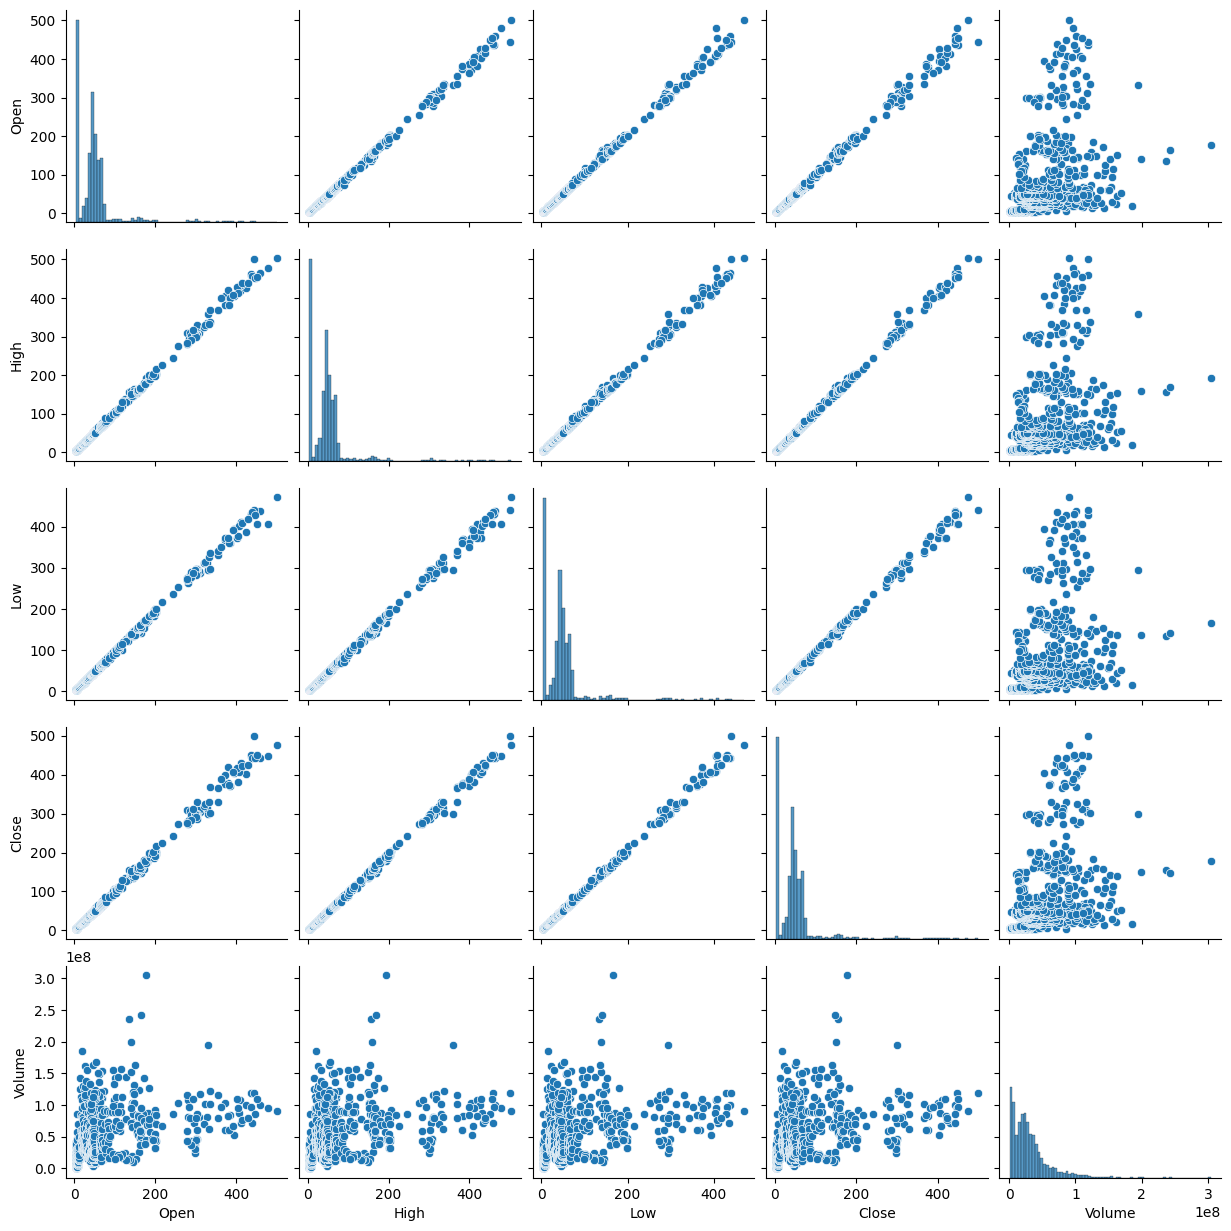

In [120]:
#viuslaizing the complete dataset
sns.pairplot(df)

<Axes: >

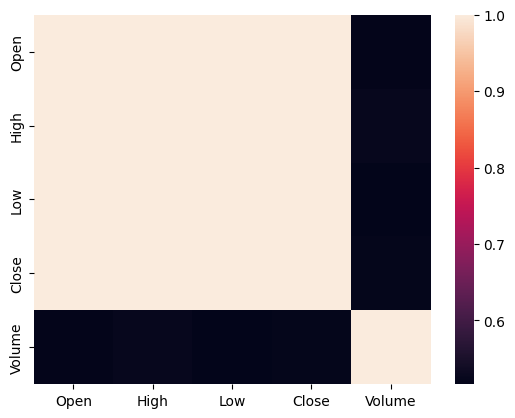

In [121]:
#heatmap of given dataset
sns.heatmap(df.corr())

<Axes: >

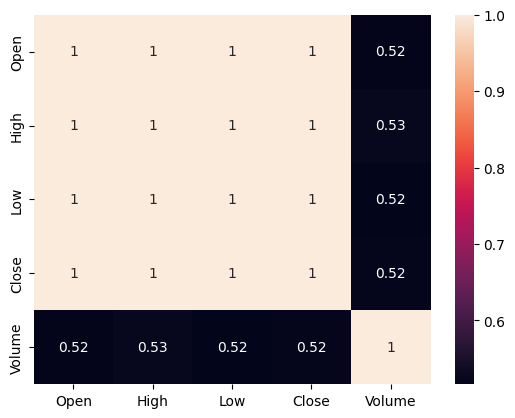

In [122]:
#heatmap of given dataset with number of coorelation between them
sns.heatmap(df.corr(),annot=True)

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [124]:
X=df[['Open', 'High', 'Low','Volume']]
y=df['Close']

In [125]:
X

,Open,High,Low,Volume
0,5.158000,6.084000,4.660000,85935500
1,5.000000,5.184000,4.054000,41094000
2,4.600000,4.620000,3.742000,25699000
3,4.000000,4.000000,3.166000,34334500
4,3.280000,3.326000,2.996000,34608500
...,...,...,...,...
2574,453.130005,455.679993,407.070007,109476800
2575,429.600006,437.760010,417.600006,79580800
2576,405.160004,412.149994,375.880005,95074200
2577,363.799988,399.500000,351.299988,96561100


In [126]:
y

0         4.766000
1         4.392000
2         3.840000
3         3.222000
4         3.160000
           ...    
2574    449.390015
2575    424.230011
2576    380.359985
2577    387.790009
2578    407.339996
Name: Close, Length: 2579, dtype: float64

In [127]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=1)

In [128]:
#creating an instance of Linear Regression model
lrmodel=LinearRegression()
lrmodel.fit(x_train,y_train)

LinearRegression()

In [129]:
# The coefficients
print('Coefficients: \n', lrmodel.coef_)

Coefficients: 
 [-5.13388514e-01  8.91929090e-01  6.18417350e-01 -7.46480833e-09]


In [130]:
print(lrmodel.intercept_)

0.15374028503789816


Interpreting the coefficients


1. A 1 unit rise in Openning price is
associated with a decrease of 0.637 (dollars) in Closing price.

2. A 1 unit rise in Highest price is associated with an increase of 0.859 (dollars) in Closing price.
3. A 1 unit rise in Lowest price is associated with an increase of 0.778 (dollars) in Closing price.

4. A 1 unit rise in Volume of the trades taken is associated with an increase of 9.3*10^-10 (dollars) in Closing price.


In [131]:
pred = lrmodel.predict(x_test)

In [132]:
print(pred)

[ 48.35674853   5.42569618  67.80637507   6.66790178  50.6036074
  50.14802756  41.90951741  24.46844366  49.63698101  43.86707618
 298.99904889  37.54966307   7.83184485  43.80404832  54.54329793
   4.81515371  43.12782944  62.2900966    6.56755905  50.91993837
 162.37926084  54.12422683  26.95797909  17.53586865  67.49389517
  45.28534157  72.86288731  49.08190496 143.38051171  51.92028842
  50.67588293  29.55124364  49.57361557  47.46237654  32.8318071
 155.13154995  62.71012968   4.30573909  43.66543617  27.60485161
  58.72015028  38.23162383  39.1132197   38.58944385  23.68135454
  39.02265522   3.43754908  40.96182741   7.96324094  52.48827593
   3.92130436   5.68993466   3.03081468  42.27453384  33.19714657
   7.27164189   7.16538637  49.52611214 449.87910687   8.24543318
 130.96453446  47.13600735  70.09486951  41.82583447  43.80068612
  55.30506642 126.72740019  64.02771166  48.67329273  67.99755703
   5.0955232   58.16665403  39.82822617  41.24564677   6.75188982
  37.4116643

Text(0, 0.5, 'Predicted Y')

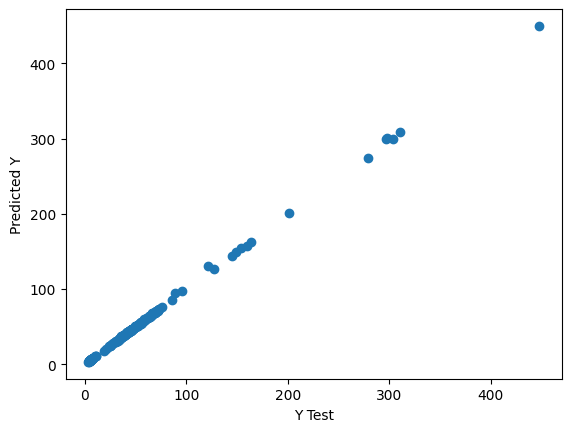

In [133]:
plt.scatter(y_test,pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [134]:
data1 = pd.DataFrame({'Actual': y_test, 'Predicted' : pred})

In [135]:
data1.head(30)

,Actual,Predicted
1299,48.598000,48.356749
205,5.348000,5.425696
1907,68.570000,67.806375
517,6.430000,6.667902
1301,49.812000,50.603607
1678,50.004002,50.148028
1122,41.400002,41.909517
760,24.690001,24.468444
1032,49.785999,49.636981
1159,43.472000,43.867076


In [136]:
import math
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.4715329496116085
MSE: 0.9039816535270245
RMSE: 0.950779497847437


<ipython-input-137-a1fc3c8ba638>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-pred),bins=50);


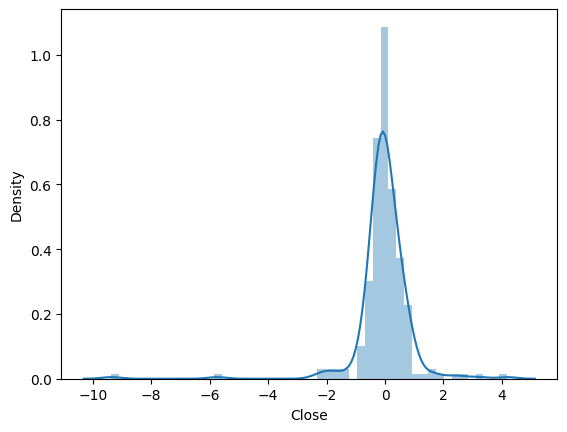

In [137]:
sns.distplot((y_test-pred),bins=50);

In [138]:
import pickle
pickle.dump(lrmodel,open('teslapred.pkl','wb'))
new_model=pickle.load(open('teslapred.pkl','rb'))
new_model.predict(np.array([20.000000,20.000000,15.830000,6866900]).reshape(1,-1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([17.46283837])

Model has predicted value 17.46 and the actual closing value was 17.56

In [139]:
df.iloc[4]

Open      3.280000e+00
High      3.326000e+00
Low       2.996000e+00
Close     3.160000e+00
Volume    3.460850e+07
Name: 4, dtype: float64

In [140]:
graph = data1.head(30)

<Axes: >

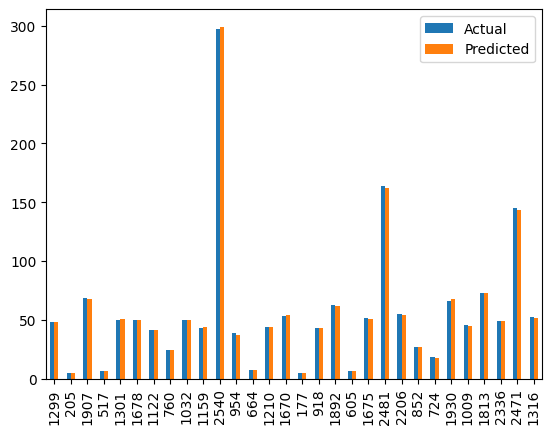

In [141]:
graph.plot(kind='bar')